# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import Data

In [4]:
data = pd.read_csv('../../Data/clustering/Data Clustering.csv')
df = data.copy()

df.head()

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [ ]:
df.describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata
count,119.000,119.000,119.000
mean,901093.622,13.504,65307.723
std,5418326.938,10.702,338302.602
min,0.000,0.000,0.000
25%,1713.000,4.000,203.000
50%,29912.000,11.000,3509.000
75%,212140.000,20.000,15273.000
max,56674832.000,41.000,3333814.000


# Deleting Outlier

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
dfOutlierBawah=data[((data<(Q1-1.5*IQR))).any(axis=1)]
dfOutlierAtas=data[((data>(Q3+1.5*IQR))).any(axis=1)]
df.describe()

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\509451465.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\509451465.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\509451465.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
C:\Users\Devic

,Total,Rentang Greentick Ke Juni 2023,Rata-rata
count,98.000,98.000,98.000
mean,62198.265,12.500,4888.755
std,102077.667,10.164,6912.454
min,0.000,0.000,0.000
25%,368.750,4.000,127.750
50%,15341.000,10.500,1791.500
75%,69343.250,20.000,6763.750
max,454770.000,41.000,26752.000


In [ ]:
dfOutlierBawah

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata


In [ ]:
dfOutlierAtas

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
3,Customer 3,381243,4,95311
8,Customer 8,869292,27,51135
9,Customer 9,1578066,5,315614
16,Customer 16,2156652,29,126862
31,Customer 31,56674832,36,3333814
32,Customer 32,13092618,9,1454736
41,Customer 41,457813,7,65402
42,Customer 42,335288,3,111763
45,Customer 45,330029,8,41254
49,Customer 49,1800386,29,105906


In [ ]:
dfOutlierAtas['cluster'] = 'safe 1'

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\2535082327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOutlierAtas['cluster'] = 'safe 1'


# Seeing Outlier

Text(0, 0.5, 'Density')

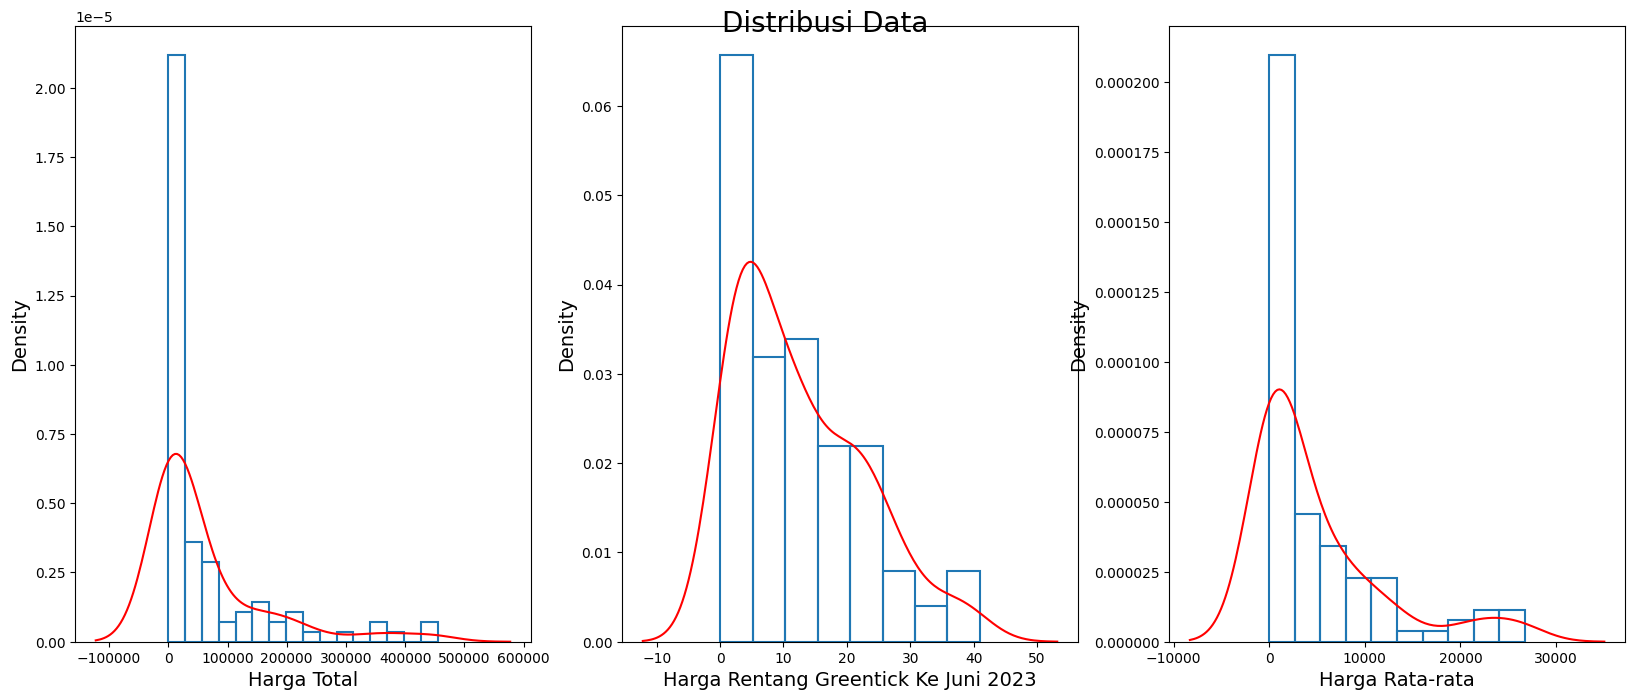

In [ ]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20, y=0.9)
sns.histplot(df["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Harga Total', fontsize=14)
sns.kdeplot(df["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Harga Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Harga Rata-rata', fontsize=14)
sns.kdeplot(df["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

# Start doing Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler

## Clustering All Data

In [ ]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

X = df[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

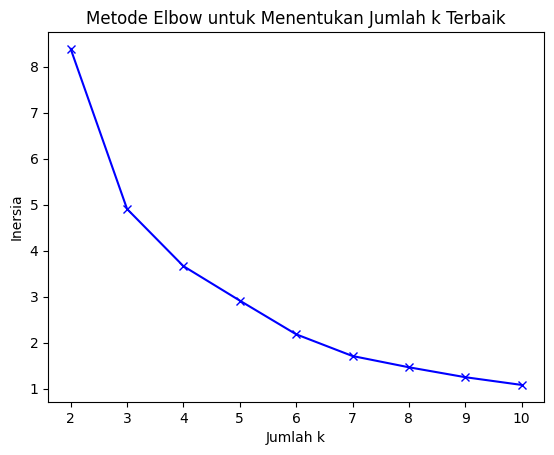

In [ ]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [ ]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.555513189520705
CH Index Score = 102.29256263424489

Jumlah Cluster = 3
Silhouette Score = 0.512587630672452
CH Index Score = 120.2190650126617

Jumlah Cluster = 4
Silhouette Score = 0.5127888897503192
CH Index Score = 116.84329386377318

Jumlah Cluster = 5
Silhouette Score = 0.42012567926493416
CH Index Score = 114.98116268487613

Jumlah Cluster = 6
Silhouette Score = 0.45176102186749933
CH Index Score = 127.72869770495464

Jumlah Cluster = 7
Silhouette Score = 0.47358077396109605
CH Index Score = 138.5929399814593

Jumlah Cluster = 8
Silhouette Score = 0.4723254872969671
CH Index Score = 139.26826954986936

Jumlah Cluster = 9
Silhouette Score = 0.4705939175190368
CH Index Score = 143.26066770145516

Jumlah Cluster = 10
Silhouette Score = 0.4680610257904798
CH Index Score = 147.01288609890238


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.555513189520705

Jumlah Cluster CH Index 

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

1    60
0    23
2    15
Name: cluster, dtype: int64

In [ ]:
df.groupby('cluster').describe().transpose()

cluster                                       0         1          2
Total                          count     23.000    60.000     15.000
                               mean   59255.217 13629.917 260984.333
                               std    56280.895 21042.838 113528.958
                               min        0.000     0.000  82788.000
                               25%    11258.500   151.000 187752.000
                               50%    38275.000  2374.000 222922.000
                               75%   104716.500 18415.500 352259.000
                               max   161923.000 72754.000 454770.000
Rentang Greentick Ke Juni 2023 count     23.000    60.000     15.000
                               mean      25.565     6.083     18.133
                               std        6.680     4.412      8.526
                               min       16.000     0.000      4.000
                               25%       20.000     2.750     13.000
                               50%       25.000     5.000     20.000
                               75%       28.500    10.000     21.000
                               max       41.000    15.000     38.000
Rata-rata                      count     23.000    60.000     15.000
                               mean    3501.261  1966.733  18704.333
                               std     3308.211  2818.487   6010.524
                               min        0.000     0.000  11084.000
                               25%      662.500    30.250  13092.500
                               50%     2252.000   440.000  20375.000
                               75%     6160.500  3391.750  23499.000
                               max     9525.000 12313.000  26752.000

<Axes: xlabel='cluster', ylabel='Rata-rata'>

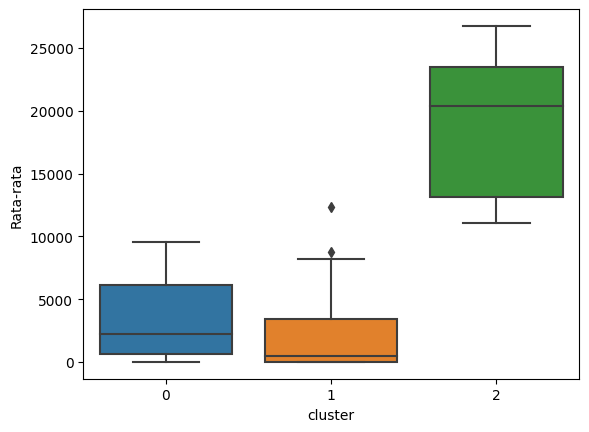

In [ ]:
sns.boxplot(x='cluster', y='Rata-rata', data=df)

In [ ]:
df

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,2
1,Customer 1,20672,3,6891,1
2,Customer 2,17148,4,4287,1
4,Customer 4,10,0,10,1
5,Customer 5,82788,4,20697,2
...,...,...,...,...,...
114,Customer 114,949,7,136,1
115,Customer 115,0,2,0,1
116,Customer 116,222204,20,13071,2
117,Customer 117,0,1,0,1


In [ ]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
2,260984.333,18.133,18704.333
0,59255.217,25.565,3501.261
1,13629.917,6.083,1966.733


In [ ]:
safe = df[df['cluster'] == 2]
safe['cluster'] = "Safe 2"
safe

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\768613260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safe['cluster'] = "Safe 2"


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,Safe 2
5,Customer 5,82788,4,20697,Safe 2
13,Customer 13,228091,20,13418,Safe 2
14,Customer 14,393048,21,23121,Safe 2
35,Customer 35,454770,23,26752,Safe 2
43,Customer 43,222922,21,13114,Safe 2
58,Customer 58,346373,28,20375,Safe 2
60,Customer 60,187089,7,26727,Safe 2
76,Customer 76,440425,38,25908,Safe 2
88,Customer 88,188415,20,11084,Safe 2


In [ ]:
df[df['cluster'] == 0]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
15,Customer 15,136700,22,8042,0
30,Customer 30,154691,20,9100,0
34,Customer 34,0,20,0,0
46,Customer 46,39103,16,2444,0
48,Customer 48,124871,24,7346,0
52,Customer 52,56140,16,3509,0
57,Customer 57,311,20,19,0
59,Customer 59,159541,25,9385,0
62,Customer 62,33366,20,1963,0
64,Customer 64,104298,28,6136,0


In [ ]:
df[df['cluster'] == 1]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,1
2,Customer 2,17148,4,4287,1
4,Customer 4,10,0,10,1
6,Customer 6,61563,5,12313,1
7,Customer 7,541,6,91,1
10,Customer 10,6,4,2,1
11,Customer 11,72754,14,5197,1
12,Customer 12,25989,7,3713,1
17,Customer 17,61245,7,8750,1
18,Customer 18,248,8,31,1


### I found that cluster 0 is a danger cluster, 1 is a warning cluster, and 2 is a safe cluster

## Clustering Danger Cluster

In [ ]:
df[df['cluster'] == 0]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
15,Customer 15,136700,22,8042,0
30,Customer 30,154691,20,9100,0
34,Customer 34,0,20,0,0
46,Customer 46,39103,16,2444,0
48,Customer 48,124871,24,7346,0
52,Customer 52,56140,16,3509,0
57,Customer 57,311,20,19,0
59,Customer 59,159541,25,9385,0
62,Customer 62,33366,20,1963,0
64,Customer 64,104298,28,6136,0


In [ ]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

Danger = df[df['cluster'] == 0]

X = Danger[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

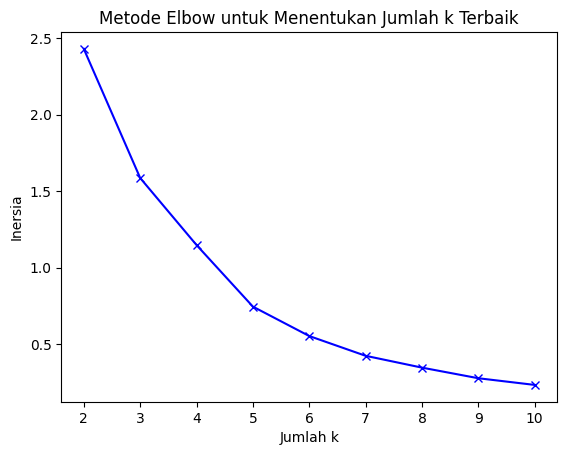

In [ ]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [ ]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.5615147096062137
CH Index Score = 38.457358924553866

Jumlah Cluster = 3
Silhouette Score = 0.4475450468914158
CH Index Score = 33.38125148437071

Jumlah Cluster = 4
Silhouette Score = 0.4419354407442547
CH Index Score = 31.6397053934194

Jumlah Cluster = 5
Silhouette Score = 0.4537143954318138
CH Index Score = 37.06260628043158

Jumlah Cluster = 6
Silhouette Score = 0.4431432096117227
CH Index Score = 38.93933565382778

Jumlah Cluster = 7
Silhouette Score = 0.41550765554734165
CH Index Score = 40.67429500512189

Jumlah Cluster = 8
Silhouette Score = 0.3858208277746085
CH Index Score = 40.4729168717223

Jumlah Cluster = 9
Silhouette Score = 0.3566869926178033
CH Index Score = 41.77718485501471

Jumlah Cluster = 10
Silhouette Score = 0.3538957022869105
CH Index Score = 41.21652908816139


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.5615147096062137

Jumlah Cluster CH Index = 9
Nil

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

Danger2Cluster = Danger.copy()

Danger2Cluster['cluster'] = kmeans.labels_
Danger2Cluster['cluster'].value_counts()

0    16
1     7
Name: cluster, dtype: int64

In [ ]:
danger1 = Danger2Cluster[Danger2Cluster['cluster'] == 1]
danger1['cluster'] = 'danger 1'
danger1

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\2117021986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danger1['cluster'] = 'danger 1'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
15,Customer 15,136700,22,8042,danger 1
30,Customer 30,154691,20,9100,danger 1
48,Customer 48,124871,24,7346,danger 1
59,Customer 59,159541,25,9385,danger 1
64,Customer 64,104298,28,6136,danger 1
75,Customer 75,161923,32,9525,danger 1
97,Customer 97,105135,37,6185,danger 1


In [ ]:
danger2 = Danger2Cluster[Danger2Cluster['cluster'] == 0]
danger2['cluster'] = 'danger 2'
danger2

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\3877388072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danger2['cluster'] = 'danger 2'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
34,Customer 34,0,20,0,danger 2
46,Customer 46,39103,16,2444,danger 2
52,Customer 52,56140,16,3509,danger 2
57,Customer 57,311,20,19,danger 2
62,Customer 62,33366,20,1963,danger 2
65,Customer 65,66782,28,3929,danger 2
66,Customer 66,9481,23,558,danger 2
67,Customer 67,6548,25,386,danger 2
79,Customer 79,32229,25,1896,danger 2
85,Customer 85,2,24,0,danger 2


## CLustering Warning Cluster

In [ ]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

warning = df[df['cluster'] == 1]

X = warning[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

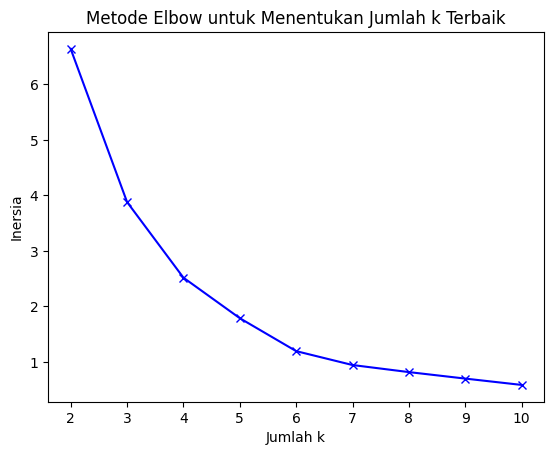

In [ ]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [ ]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.5481483378721966
CH Index Score = 56.68947662007699

Jumlah Cluster = 3
Silhouette Score = 0.46261562638712694
CH Index Score = 67.92600640950361

Jumlah Cluster = 4
Silhouette Score = 0.5067535557279766
CH Index Score = 78.67801971497667

Jumlah Cluster = 5
Silhouette Score = 0.5218366032175475
CH Index Score = 87.23395324526862

Jumlah Cluster = 6
Silhouette Score = 0.5333418350638777
CH Index Score = 107.96570498530144

Jumlah Cluster = 7
Silhouette Score = 0.5352226671146171
CH Index Score = 114.08884290204215

Jumlah Cluster = 8
Silhouette Score = 0.5185128417442184
CH Index Score = 112.07500393276993

Jumlah Cluster = 9
Silhouette Score = 0.5002755931866671
CH Index Score = 113.34466676664061

Jumlah Cluster = 10
Silhouette Score = 0.5451224350171928
CH Index Score = 119.11818617758337


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.5481483378721966

Jumlah Cluster CH Index =

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

warning4Cluster = warning.copy()

warning4Cluster['cluster'] = kmeans.labels_
warning4Cluster['cluster'].value_counts()

0    27
2    16
1     9
3     8
Name: cluster, dtype: int64

In [ ]:
warning2 = warning4Cluster[warning4Cluster['cluster'] == 0]
warning2['cluster'] = 'warning 2'
warning2

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\2484637608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning2['cluster'] = 'warning 2'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
4,Customer 4,10,0,10,warning 2
7,Customer 7,541,6,91,warning 2
10,Customer 10,6,4,2,warning 2
20,Customer 20,189,2,95,warning 2
21,Customer 21,169,0,169,warning 2
22,Customer 22,310,2,155,warning 2
23,Customer 23,4,1,4,warning 2
24,Customer 24,2851,5,571,warning 2
27,Customer 27,97,1,97,warning 2
36,Customer 36,473,2,237,warning 2


In [ ]:
warning3 = warning4Cluster[warning4Cluster['cluster'] == 1]
warning3['cluster'] = 'warning 3'
warning3

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\3845305123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning3['cluster'] = 'warning 3'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
6,Customer 6,61563,5,12313,warning 3
11,Customer 11,72754,14,5197,warning 3
17,Customer 17,61245,7,8750,warning 3
19,Customer 19,55956,12,4663,warning 3
37,Customer 37,71222,12,5936,warning 3
73,Customer 73,52302,14,3736,warning 3
81,Customer 81,70197,11,6382,warning 3
105,Customer 105,38902,14,2779,warning 3
109,Customer 109,46967,6,7828,warning 3


In [ ]:
warning4Cluster[warning4Cluster['cluster'] == 2]
warning4 = warning4Cluster[warning4Cluster['cluster'] == 2]
warning4['cluster'] = 'warning 4'
warning4

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\1194063671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning4['cluster'] = 'warning 4'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
18,Customer 18,248,8,31,warning 4
25,Customer 25,7089,12,591,warning 4
26,Customer 26,1499,12,125,warning 4
28,Customer 28,1555,11,142,warning 4
39,Customer 39,18251,10,1826,warning 4
44,Customer 44,279,10,28,warning 4
56,Customer 56,6251,7,893,warning 4
68,Customer 68,2434,7,348,warning 4
70,Customer 70,11,8,2,warning 4
77,Customer 77,18909,15,1261,warning 4


In [ ]:
warning1 = warning4Cluster[warning4Cluster['cluster'] == 3]
warning1['cluster'] = 'warning 1'
warning1

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_10404\2748528595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning1['cluster'] = 'warning 1'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,warning 1
2,Customer 2,17148,4,4287,warning 1
12,Customer 12,25989,7,3713,warning 1
29,Customer 29,24467,3,8156,warning 1
33,Customer 33,10088,3,3363,warning 1
38,Customer 38,13912,4,3478,warning 1
51,Customer 51,16770,3,5590,warning 1
55,Customer 55,24316,4,6079,warning 1


3 aman, 0 aman, 1 warning 2 parah  

In [ ]:
df = pd.concat([dfOutlierAtas, safe, danger1, danger2, warning1, warning2, warning3, warning4], ignore_index=True)
df

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 3,381243,4,95311,safe 1
1,Customer 8,869292,27,51135,safe 1
2,Customer 9,1578066,5,315614,safe 1
3,Customer 16,2156652,29,126862,safe 1
4,Customer 31,56674832,36,3333814,safe 1
...,...,...,...,...,...
114,Customer 86,5774,11,525,warning 4
115,Customer 96,4260,12,355,warning 4
116,Customer 99,23268,14,1662,warning 4
117,Customer 103,1928,13,149,warning 4


In [ ]:
df[df['cluster'].astype(str).str.contains('saf', case=False, na=False)]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 3,381243,4,95311,safe 1
1,Customer 8,869292,27,51135,safe 1
2,Customer 9,1578066,5,315614,safe 1
3,Customer 16,2156652,29,126862,safe 1
4,Customer 31,56674832,36,3333814,safe 1
5,Customer 32,13092618,9,1454736,safe 1
6,Customer 41,457813,7,65402,safe 1
7,Customer 42,335288,3,111763,safe 1
8,Customer 45,330029,8,41254,safe 1
9,Customer 49,1800386,29,105906,safe 1


In [ ]:
df[df['cluster'].astype(str).str.contains('war', case=False, na=False)]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
59,Customer 1,20672,3,6891,warning 1
60,Customer 2,17148,4,4287,warning 1
61,Customer 12,25989,7,3713,warning 1
62,Customer 29,24467,3,8156,warning 1
63,Customer 33,10088,3,3363,warning 1
64,Customer 38,13912,4,3478,warning 1
65,Customer 51,16770,3,5590,warning 1
66,Customer 55,24316,4,6079,warning 1
67,Customer 4,10,0,10,warning 2
68,Customer 7,541,6,91,warning 2


In [ ]:
df[df['cluster'].astype(str).str.contains('dan', case=False, na=False)]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
36,Customer 15,136700,22,8042,danger 1
37,Customer 30,154691,20,9100,danger 1
38,Customer 48,124871,24,7346,danger 1
39,Customer 59,159541,25,9385,danger 1
40,Customer 64,104298,28,6136,danger 1
41,Customer 75,161923,32,9525,danger 1
42,Customer 97,105135,37,6185,danger 1
43,Customer 34,0,20,0,danger 2
44,Customer 46,39103,16,2444,danger 2
45,Customer 52,56140,16,3509,danger 2


In [ ]:
df

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 3,381243,4,95311,safe 1
1,Customer 8,869292,27,51135,safe 1
2,Customer 9,1578066,5,315614,safe 1
3,Customer 16,2156652,29,126862,safe 1
4,Customer 31,56674832,36,3333814,safe 1
...,...,...,...,...,...
114,Customer 86,5774,11,525,warning 4
115,Customer 96,4260,12,355,warning 4
116,Customer 99,23268,14,1662,warning 4
117,Customer 103,1928,13,149,warning 4
